<a href="https://colab.research.google.com/github/ed-roberts-github/Previous-work/blob/main/thompson_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling

## Importing the libraries

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [22]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [23]:
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d #no. of times ad i got reward 1 up to round n
numbers_of_rewards_0 = [0] * d #no. of times ad i got reward 0 up to round n
total_reward = 0
for n in range(0,N):
  ad = 0 #ad that is selected 
  max_random = 0 
  for i in range(0,d):
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
    if (random_beta > max_random):
      ad = i
      max_random = random_beta
  ads_selected.append(ad)

  #adding the reward number to approriate list
  reward = dataset.values[n, ad]
  if (reward == 1):
    numbers_of_rewards_1[ad] += 1
  else:
    numbers_of_rewards_0[ad] += 1 
  total_reward = total_reward + reward

## Visualising the results - Histogram

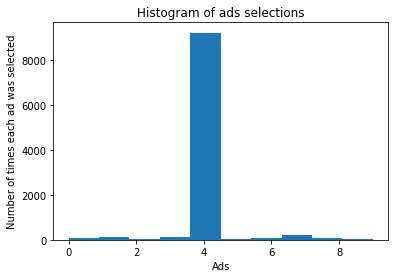

In [24]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

Remember UCB couldn't figure out best ad in 500 rounds but here if N is changed to 500 Thompson sampling still gets the correct add. Can see even here that the plot has a much bigger peak at ad 4 and other peaks are smaller than they were compared to UCB. So here Thompson seems to work better. In general Thompson samping is better than UCB.